# Project: Investigate a Dataset (No-show appointments Data)

(original source on Kaggle) https://www.kaggle.com/joniarroba/noshowappointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
 - ‘ScheduledDay’ tells us on what day the patient set up their appointment.
 - ‘Neighborhood’ indicates the location of the hospital.
 - ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
 - Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## Q1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
## Q2. Which factor combination create a significant difference in 'show-up rate' ? Which factor should be fixed for these combination test?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv 
import seaborn as sb

In [2]:
df = pd.read_csv('C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L3/case03-project/data/noshowappointments-kagglev2-may-2016.csv')
df.shape

(110527, 14)

### FYI, Logistic regression shows there is no significant predictors.

In [3]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [64]:
# Logistic regression: Gender, AppointmentDay, Age, Neighbourhood, Scholarship/Hipertension/Diabetes/Alcoholism/Handcap/
#SMS_received

import statsmodels.api as sm
df['intercept'] = 1

log_model = sm.Logit(df['showup'], df[['intercept', 'male', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']])
result = log_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.493037
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 showup   No. Observations:               110526
Model:                          Logit   Df Residuals:                   110517
Method:                           MLE   Df Model:                            8
Date:                Sat, 13 Jan 2018   Pseudo R-squ.:                 0.01995
Time:                        21:22:09   Log-Likelihood:                -54493.
converged:                       True   LL-Null:                       -55603.
                                        LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.3842      0.018     78.715      0.000       1.350       1.419
male             0.0181      0.016      1.114      0.265      -0.014       0.050
Age              0.0066      0.000     16.731      0.000       0.006       0.007
Scholarship     -0.1844      0.025     -7.522      0.000      -0.232      -0.136
Hipertension     0.0678      0.025      2.756      0.006       0.020       0.116
Diabetes        -0.0853      0.034     -2.501      0.012      -0.152      -0.018
Alcoholism      -0.1400      0.045     -3.126      0.002      -0.228      -0.052
Handcap         -0.0238      0.056     -0.424      0.672      -0.134       0.086
SMS_received    -0.6498      0.015    -42.001      0.000      -0.680      -0.620
================================================================================
"""

<a id='wrangling'></a>
## Data Wrangling I 
General Properties

Q. First, we check the basic properties of our dataset - 'missing values', 'duplicates' 

In [4]:
# duplicate rows
sum(df.duplicated())
# missing rows?
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# == It has no duplicates or missing values!

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Q. We want to know how long this data had been collected.

In [6]:
df.ScheduledDay.min(), df.ScheduledDay.max()

('2015-11-10T07:13:56Z', '2016-06-08T20:07:23Z')

== around 5 months

In [7]:
df.AppointmentDay.min(), df.AppointmentDay.max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

#### == around over 1 month of appointment period

Q. Are all records unique?

In [8]:
# 110527 > 62299
df.PatientId.nunique()

62299

#### == It seems some patients provided multiple records.

Q. What is scholarship?

In [9]:
df.Scholarship.unique()

array([0, 1], dtype=int64)

Q. What is handcap ?

In [10]:
df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

## Data Wrangling II
Cleaning (fix predictors and the target variable)

Q. **First, in the Documentation, Handcap comes with 2 levels - True/False so '1/0' ;However, the unique values in Handcap consists of 0/1/2/3/4 We need to investigate what they are.** 

In [11]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

== **I believe Handcap 1/2/3/4 should be replaced with 1.**

In [12]:
df.Handcap = df.Handcap.replace([1,2,3,4], 1)

In [13]:
df['Handcap'].value_counts()

0    108286
1      2241
Name: Handcap, dtype: int64

In [14]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.020276,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.140942,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Q. **Second, we found a suspicious value in the summary of 'Age' above. The age -1 seems weird. Perhaps an outlier..** 

In [15]:
df[df.Age < 0 ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [16]:
df.iloc[99832]

PatientId                  4.65943e+14
AppointmentID                  5775010
Gender                               F
ScheduledDay      2016-06-06T08:58:13Z
AppointmentDay    2016-06-06T00:00:00Z
Age                                 -1
Neighbourhood                    ROMÃO
Scholarship                          0
Hipertension                         0
Diabetes                             0
Alcoholism                           0
Handcap                              0
SMS_received                         0
No-show                             No
Name: 99832, dtype: object

We remove one of the rows with a negative age value and PatientId - drop the desired value using the index directly.

In [17]:
df = df.drop(99832)
df = df.reset_index(drop=True)
df.iloc[99832]

PatientId                  2.89827e+13
AppointmentID                  5774075
Gender                               M
ScheduledDay      2016-06-06T07:50:27Z
AppointmentDay    2016-06-06T00:00:00Z
Age                                  1
Neighbourhood           FORTE SÃO JOÃO
Scholarship                          0
Hipertension                         0
Diabetes                             0
Alcoholism                           0
Handcap                              0
SMS_received                         0
No-show                             No
Name: 99832, dtype: object

Q. **Third, seemingly, our response variable -'No show'- is categorical and we need to convert it to a binary format for an easier analysis.** 

In [18]:
# A response variable is categorical. 
df[['showup', 'noshowup']] = pd.get_dummies(df['No-show'])

In [19]:
df.drop(['noshowup', 'No-show'], axis=1, inplace=True)
df[['female', 'male']] = pd.get_dummies(df['Gender'])
df.drop('female', axis=1, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showup,male
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1.0,0.0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1.0,1.0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1.0,0.0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1.0,0.0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1.0,0.0


Now we are good to go !

<a id='eda'></a>
## Exploratory Data Analysis


### Q1. *Histogram - .How they look like?!)

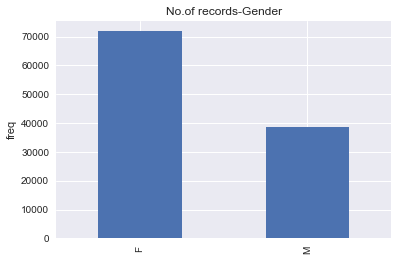

In [20]:
# Gender
df.Gender.value_counts().plot(kind='bar')
plt.ylabel('freq')
plt.title('No.of records-Gender')

== There are more female-records 

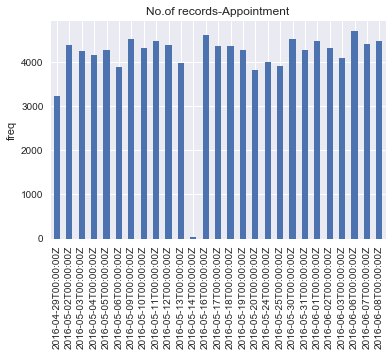

In [21]:
# Appointment time
df.AppointmentDay.value_counts().sort_index().plot(kind='bar')
plt.ylabel('freq')
plt.title('No.of records-Appointment')

== There seems a little cyclical pattern in Appointments frequency. 

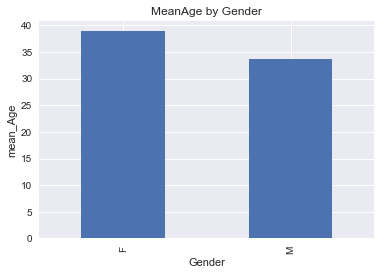

In [22]:
# Age
gen_means = df.groupby('Gender')['Age'].mean()
gen_means.plot(kind='bar')
plt.ylabel('mean_Age')
plt.title('MeanAge by Gender')

== Interestingly, the average age of the medical appointment is less than 40s in both male and female.

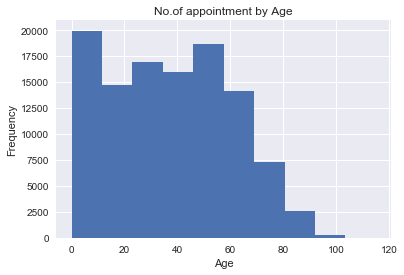

In [23]:
df.Age.plot(kind='hist')
plt.xlabel('Age')
plt.title('No.of appointment by Age')

== The most frequent appointments made for young children group with age from 0 to 10 which is follwed by the age group - 40 to 50. we should note that eventhough there were higher 'show-up rate' occur in the oldest age group (90 to 120), due to the insignificant total record numbers, we would not rely on the result that has to do with these groups.    

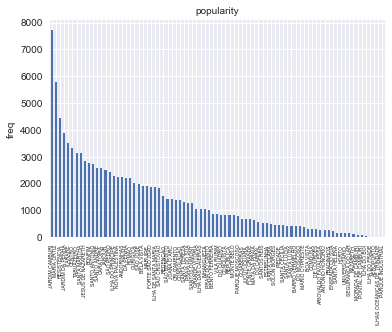

In [25]:
# Hospital location
df.Neighbourhood.value_counts().plot(kind='bar')
plt.ylabel('freq')
plt.title('popularity')

SMALL_SIZE = 6
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

== It's hard to interpret because we don't have any geographical information, but there are clearly some hospitals more popular than others. 

In [26]:
# proportions
df['showup'].mean(), df['Scholarship'].mean(), df['Hipertension'].mean(), df['Diabetes'].mean(), df['Alcoholism'].mean(), df['Handcap'].mean(), df['SMS_received'].mean()

(0.7980656135208005,
 0.09826647123753687,
 0.19724770642201836,
 0.07186544342507645,
 0.030400086857391023,
 0.020275772216492047,
 0.3210285362720084)

== Patients are showing up with the probability of 0.798 on average. 9% of patients have Scholarship, 20% suffer from Hypertension, 7% come for diabetes, 3% have alcoholism, 2% have handcap, and 32% received SMS.  

### Q2. relationship with target variable:  
showup VS. Gender, AppointmentDay, Age, Neighbourhood, Scholarship/Hipertension/Diabetes/Alcoholism/Handcap/SMS_received

In [27]:
df.groupby('Scholarship').mean()['showup']

Scholarship
0    0.801926
1    0.762637
Name: showup, dtype: float64

In [28]:
df['showup'].corr(df.Scholarship)

-0.029133576642242968

== Patients who have scholarship show 76% of odds to show up for the appointment, but patient without scholarship show 80%. it seems that there is no significant relationship between show-up rate and scholarship. 

In [29]:
df.groupby('Hipertension').mean()['showup']

Hipertension
0    0.790961
1    0.826980
Name: showup, dtype: float64

In [30]:
df['showup'].corr(df.Hipertension)

0.035703513860921986

== Patients who have Hypertension show 83% of odds to show up for the appointment, but patient without Hypertension show 79%. it seems that there is no significant relationship between show-up rate and Hypertension.

In [31]:
df.groupby('Diabetes').mean()['showup']

Diabetes
0    0.796370
1    0.819967
Name: showup, dtype: float64

In [32]:
df['showup'].corr(df.Diabetes)

0.015181232917013499

== Patients who have Diabetes shows 82% of odds to show up for the appointment, but patient without Diabetes show 80%. it seems that there is no significant relationship between show-up rate and Diabetes.

In [33]:
df.groupby('Alcoholism').mean()['showup']

Alcoholism
0    0.798052
1    0.798512
Name: showup, dtype: float64

In [34]:
df['showup'].corr(df.Alcoholism)

0.0001968498339555157

== Patients who have Alcoholism show 80% of odds to show up for the appointment, but patient without Alcoholism show 80%. it seems that there is no significant relationship between show-up rate and Alcoholism.

In [35]:
df.groupby('Handcap').mean()['showup']

Handcap
0    0.797645
1    0.818385
Name: showup, dtype: float64

In [36]:
df['showup'].corr(df.Handcap)

0.0072814092759442362

== Patients who have Handcap shows from 82% of odds to show up for the appointment, but patient without Handcap show 80%. it seems that there is no significant relationship between show-up rate and Handcap.

In [37]:
df.groupby('SMS_received').mean()['showup']

SMS_received
0    0.832965
1    0.724255
Name: showup, dtype: float64

In [38]:
df['showup'].corr(df.SMS_received)

-0.1264279432991246

== Patients who have received SMS show 72% of odds to show up for the appointment, but patient receiving SMS show 83%. it seems that there is no significant relationship between show-up rate and SMS reception.

(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.]),
 <a list of 7 Text xticklabel objects>)

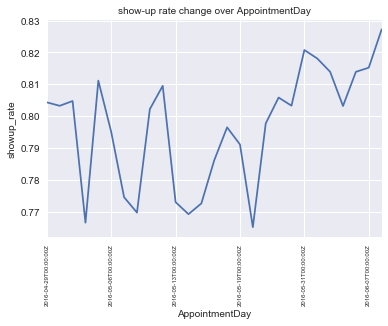

In [40]:
# AppointmentDay vs showup
df.groupby('AppointmentDay').mean()['showup'].plot()
plt.ylabel('showup_rate')
plt.title('show-up rate change over AppointmentDay' )

plt.xticks(rotation=90)
#ax.set_xticklabels(xticklabels, rotation = 45, ha="right")
#ax.set_xticklabels(xticklabels, rotation = 45, va="center", position=(0,-0.28))

== Show up rates also show a cyclical pattern with the passage of Appointment Days.

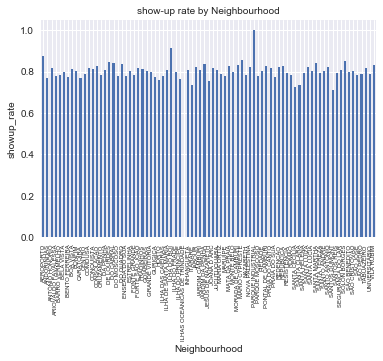

In [41]:
# Neighbourhood vs showup
hospital = df.groupby('Neighbourhood').mean()['showup']
hospital.plot('bar')
plt.ylabel('showup_rate')
plt.title('show-up rate by Neighbourhood' )

== It's hard to tell which area has the highest or lowest show up rate. Then we can list them as follows.

In [42]:
# SORTING with 0 is key, 1 is value
from operator import itemgetter

sorted(hospital.items(), key=itemgetter(1))

[('ILHAS OCEÂNICAS DE TRINDADE', 0.0),
 ('SANTOS DUMONT', 0.71081504702194354),
 ('SANTA CECÍLIA', 0.7254464285714286),
 ('SANTA CLARA', 0.7351778656126482),
 ('ITARARÉ', 0.73733636881047238),
 ('JESUS DE NAZARETH', 0.75604626708727651),
 ('HORTO', 0.76000000000000001),
 ('ILHA DO PRÍNCIPE', 0.76522506619594),
 ('CARATOÍRA', 0.76959064327485383),
 ('ANDORINHAS', 0.76967285587975243),
 ('PRAIA DO SUÁ', 0.77173913043478259),
 ('GURIGICA', 0.77403369672943512),
 ('BENTO FERREIRA', 0.77505827505827507),
 ('PARQUE MOSCOSO', 0.77680798004987528),
 ('MARUÍPE', 0.7770767613038907),
 ('DO MOSCOSO', 0.77723970944309928),
 ('ENSEADA DO SUÁ', 0.77872340425531916),
 ('ARIOVALDO FAVALESSA', 0.78014184397163122),
 ('ILHA DAS CAIEIRAS', 0.78057889822595705),
 ('FONTE GRANDE', 0.78152492668621698),
 ('CRUZAMENTO', 0.7825464949928469),
 ('SÃO JOSÉ', 0.78351036924633288),
 ('BARRO VERMELHO', 0.78486997635933808),
 ('NAZARETH', 0.78518518518518521),
 ('ROMÃO', 0.78590785907859073),
 ('CENTRO', 0.789142171

== A hospital in 'PARQUE INDUSTRIAL' shows 100% show-up rate while the one in 'ILHAS OCEÂNICAS DE TRINDADE' shows 0%. but we are not sure if this results from the locational features because we don't have any geographical knowledge. 

## How about Gender? 

In [43]:
df.groupby(['showup', 'Gender']).mean()

PatientId  AppointmentID        Age  Scholarship  \
showup Gender                                                        
0.0    F       1.452126e+14   5.651340e+06  36.162190     0.144306   
       M       1.496610e+14   5.653994e+06  30.833010     0.061100   
1.0    F       1.462122e+14   5.680199e+06  39.591126     0.117862   
       M       1.503964e+14   5.682868e+06  34.461372     0.049609   

               Hipertension  Diabetes  Alcoholism   Handcap  SMS_received  \
showup Gender                                                               
0.0    F           0.182061  0.069686    0.021105  0.016651      0.460463   
       M           0.144337  0.053463    0.047767  0.021230      0.396634   
1.0    F           0.221539  0.080164    0.015984  0.018290      0.305389   
       M           0.172696  0.062141    0.057102  0.025418      0.265358   

               male  
showup Gender        
0.0    F        0.0  
       M        1.0  
1.0    F        0.0  
       M        1.0

In [44]:
# Gender vs showup 
df.groupby('Gender').mean()['showup']

Gender
F    0.796851
M    0.800321
Name: showup, dtype: float64

In [45]:
df.showup.corr(df.male)

0.0041219877427054966

== Female patients tend to show up for the appointment **1% less often** than their opposites. it seems that there is no significant relationship between show-up rate and Gender.

# However,
Gender is an interesting factor. The size of female is bigger than male, but its difference in show-up rate between genders is insignificant; therefore, due to its integrity, we can investigate this factor further by associating it with other variables.

### First, with Age

In [46]:
df['showup'].corr(df.Age)

0.060326822722913301

== although 'Age' is not considered as a significant factor, when we group together with 'Gender', 

In [47]:
df['agess'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120'])


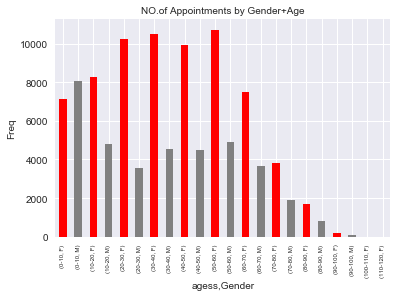

In [48]:
df.groupby(['agess', 'Gender']).PatientId.count().plot(kind='bar', color=['red', 'grey'])
plt.ylabel('Freq')
plt.title('NO.of Appointments by Gender+Age')

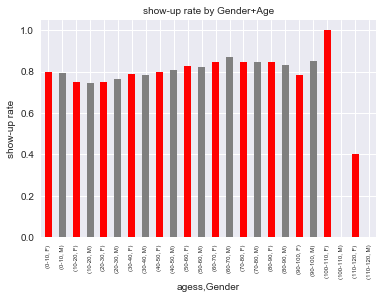

In [49]:
df.groupby(['agess', 'Gender']).mean()['showup'].plot(kind='bar', color=['red', 'grey'])
plt.ylabel('show-up rate')
plt.title('show-up rate by Gender+Age')

### Female in general clearly made more appointments(from the age of 10 to 80), but there is no significant difference in 'show-up rate' between genders.

# How about other factors? (with Gender) 

We investigate the combinations - Gender vs Scholarship/Hipertension/Diabetes/Alcoholism/Handcap/SMS_received

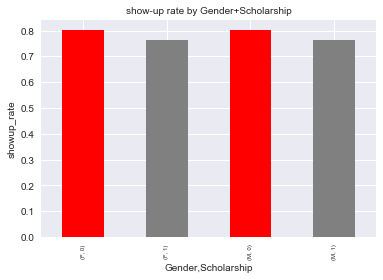

In [51]:
df.groupby(['Gender', 'Scholarship']).mean()['showup'].plot(kind='bar', color=['red','grey'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Gender+Scholarship')

In both gender, by a narrow margin, those **without scholarship** are prone to show up more. 

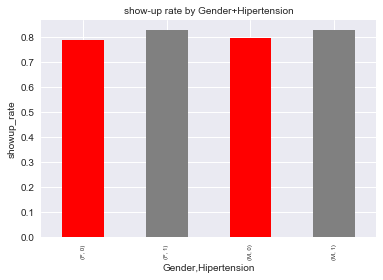

In [52]:
df.groupby(['Gender', 'Hipertension']).mean()['showup'].plot(kind='bar', color=['red','grey'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Gender+Hipertension')

In both gender,  by a narrow margin, those **with Hypertension** are likely to show up more. 

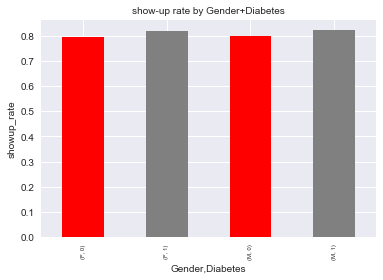

In [53]:
df.groupby(['Gender', 'Diabetes']).mean()['showup'].plot(kind='bar', color=['red','grey'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Gender+Diabetes')

In both gender, by a narrow margin, those **with Diabetes** are likely to show up more. 

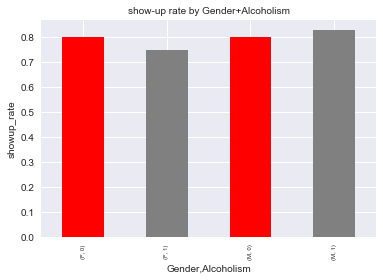

In [54]:
df.groupby(['Gender', 'Alcoholism']).mean()['showup'].plot(kind='bar', color=['red','grey'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Gender+Alcoholism')

## Interestingly, in male, those with Alcoholism show up more, but in female, this is reverse. 

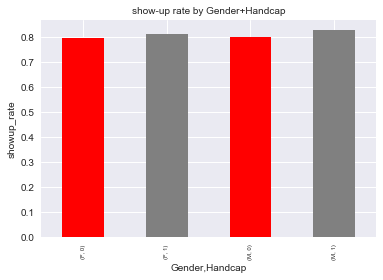

In [50]:
df.groupby(['Gender', 'Handcap']).mean()['showup'].plot(kind='bar', color=['red','grey'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Gender+Handcap')

== Interestingly, in both male and female, those with Handcap tend to show up more often, but it's not to say there is a significant difference between them. 

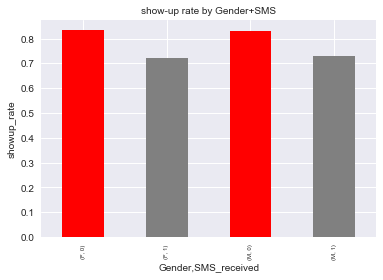

In [55]:
df.groupby(['Gender', 'SMS_received']).mean()['showup'].plot(kind='bar', color=['red','grey'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Gender+SMS')

## Interestingly, groups that did not receive SMS tend to show higher 'show-up rate' in both male and female.  

# How about other factors? (with Age)

We investigate the combinations - Age vs Scholarship/Hipertension/Diabetes/Alcoholism/Handcap/SMS_received

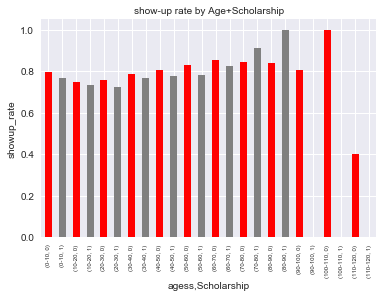

In [57]:
df.groupby(['agess', 'Scholarship']).mean()['showup'].plot(kind='bar', color=['red','grey'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Age+Scholarship')

== From the age group of 70, the encouragement of scholarship starts to kick off and gain its meaning.  

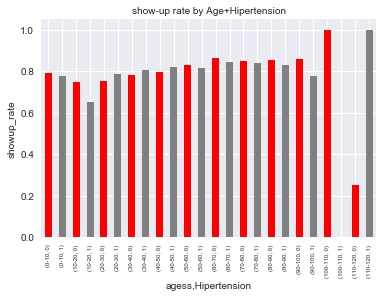

In [58]:
df.groupby(['agess', 'Hipertension']).mean()['showup'].plot(kind='bar', color=['red','grey'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Age+Hipertension')

== Interestingly, **among teenagers**, less than 70% of those with hypertension tend to show up, which is less than average of all across the ages.     

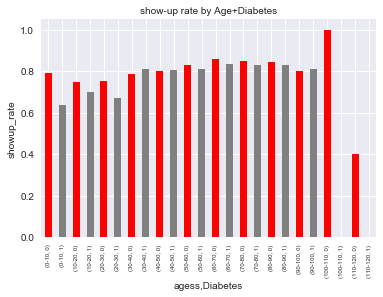

In [59]:
df.groupby(['agess', 'Diabetes']).mean()['showup'].plot(kind='bar', color=['red','grey'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Age+Diabetes')

== Teenagers with diabetes are hardly show up here. 

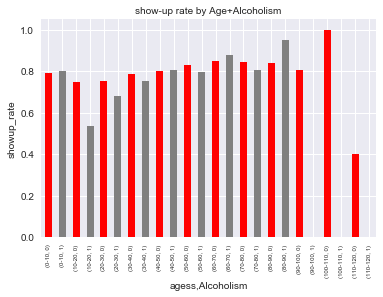

In [60]:
df.groupby(['agess', 'Alcoholism']).mean()['showup'].plot(kind='bar', color=['red','grey'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Age+Alcoholism')

### Interestingly, **among teenagers**, less than 60% of those with alcoholism tend to show up, which is way below average all across the ages.

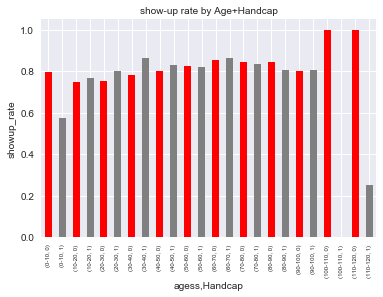

In [61]:
df.groupby(['agess', 'Handcap']).mean()['showup'].plot(kind='bar', color=['red','grey'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Age+Handcap')

### Among young children at the age of (0 to 10), those with handcap hardly show up and less than 60%.  

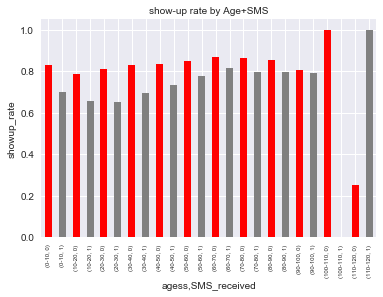

In [56]:
df.groupby(['agess', 'SMS_received']).mean()['showup'].plot(kind='bar', color=['red','grey'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Age+SMS')

== in Age groups, it is also apparent that SMS has a negative impact on show-up rate. 
## Groups that did not receive SMS tend to show higher 'show-up rate' across all ages too! 

<a id='conclusions'></a>
## Conclusions



== When exploring its general properties, we saw that there is no independent variables that have clear impacts on the dependent variable. Instead, we attempted to find the variable combinations that create more discernable impact. Over the course of exploration, we discovered a set of relatively significant differences when we use Gender, Age, Received_SMS variable. In general, we can say that the grown-up female tend to make more appointments than their counterparts but this results from the total number of female records. 
### What is noticeable is that first, SMS has absolutely negative impact on show-up rate and among teenagers, alcoholism and hypertension are not the crucial factors that lead them to show up  with the 'show-up rate' below average. For women, less than 80% of them show up for alcoholism.   


== The limitation:

1) Although knowing that each data point was collected from certain hospitals and knowing where those hospitals are located, we don't have any clue about how to conceive those geographical information in terms of understanding of our observed 'show-up rate'. For example, if a certain hospital is located in a remote area, we can expect that it hinders the 'show-up rate' from rising so high as it otherwise would do. If the location of a certain hospital is mainly populated by old people, the 'show-up rate' analysis can become biased because we might conclude that old people show up more often. 

Unfortunately, without having precise understanding about the geographical context of the locations where our data points are collected, we cannot see our result of this analysis is reliable. Let's say our analysis speaks female patients tend not to show up for the appointment, we cannot be sure whether this results from lots of data points collected from areas mainly populated by female citizens. We don't know whether female citizens make more medical appointments because they are weak or they simply outnumber in the area where data are collected.          

2) Our statistical test (z-test) says 'Gender' is not a significant predictors, but the model's R-squared value is extremely low (0.02), thus we cannot trust our test result.

## 3) I believe that we don't have enough data. As can be seen above, the data were collected for only 1 month period and there is a huge difference in the number of records between male and female. We can do bootstrapping to deal with this issue, but if we had more time to collect data, the analysis would be more reliable.   